In [ ]:
# By Mehdi Ammi, Univ. Paris 8

# From Self-Attention mechanism to Transformers

This notebook aims to provide a comprehensive and practical understanding of the self-attention mechanism and its applications in various contexts, through detailed explanations, visualizations and interactive exercises.

## Self-Attention mechanism: basic implementation

Here is an example of Python code using TensorFlow and Matplotlib to explain and visualize the Self-Attention mechanism. This code shows intermediate steps such as generating queries, keys, and values ​​matrices, as well as calculating attention scores and applying attention weights to values. .

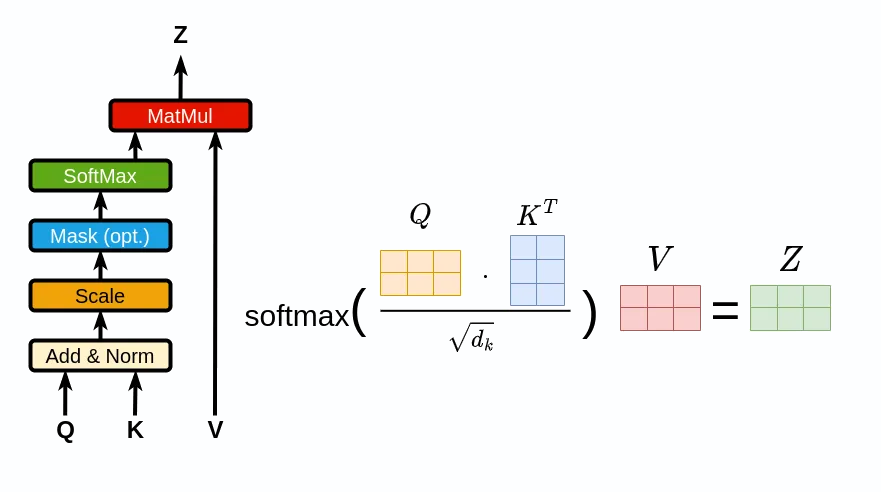

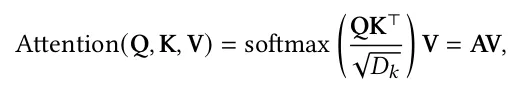

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

# Input sequence: a matrix where each row represents a feature vector for a sequence element
input_sequence = np.array([[1, 0, 1, 0],
                           [0, 2, 1, 0],
                           [1, 1, 0, 1]])

# Model parameters
d_model = input_sequence.shape[1]  # Dimension of the embeddings
num_heads = 1  # Number of attention heads (single head for simplicity)

# Create query, key, and value matrices using linear transformations (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

# Visualize the query, key, and value matrices
plot_matrix(query, "Query Matrix")
plot_matrix(key, "Key Matrix")
plot_matrix(value, "Value Matrix")

# Compute attention scores by performing dot product of queries and transposed keys
scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores, "Attention Scores (QK^T)")

# Apply softmax to the scores to obtain attention weights
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights, "Attention Weights (Softmax)")

# Apply attention weights to the values to get the final attention output
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output, "Attention Output")

# Print the results for reference
print("Input Sequence:\n", input_sequence)
print("Query Matrix:\n", query.numpy())
print("Key Matrix:\n", key.numpy())
print("Value Matrix:\n", value.numpy())
print("Attention Scores:\n", scores.numpy())
print("Attention Weights:\n", attention_weights.numpy())
print("Attention Output:\n", attention_output.numpy())

### Detailed Explanations of Each Step
#### Input Sequence: The input sequence is a matrix where each row represents a feature vector for an element of the sequence. This is the data we want to apply self-attention to.

#### Query, Key, and Value Matrices: These matrices are created by applying linear transformations (Dense layers) to the input sequence.
- Queries: Used to compare against keys to measure similarity.
- Keys: Used in conjunction with queries to compute attention scores.
- Values: Contain the information we want to focus on and extract based on the computed attention scores.

#### Attention Scores:

- Calculated by taking the dot product of the query matrix and the transposed key matrix.
- This gives a measure of similarity between elements of the sequence.

#### Attention Weights:

- The scores are passed through a softmax function to convert them into probabilities (attention weights).
- These weights determine the relative importance of each element in the sequence.

#### Attention Output:

- The attention weights are applied to the value matrix to compute the final attention output.
- This output represents the weighted sum of values based on their attention weights, capturing the relevant information from the input sequence.

### Visualizations
- Query, Key, and Value Matrices: Visualized to understand how the input sequence is transformed.
- Attention Scores: Show the similarity measures between different elements of the sequence.
- Attention Weights: Show the normalized importance of each element in the sequence.
- Attention Output: The final weighted output that captures the important information based on the attention mechanism.

## Self-Attention mechanism: Using a sentence as input

The sentence "I love tennis" is represented using embeddings, and the self-attention mechanism is applied to transform these embeddings.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Example sentence embeddings (3 dimensions per word)
embeddings = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "tennis": [1, 1, 1]
}

# Convert sentence to sequence of embeddings
sentence = ["I", "love", "tennis"]
inputs = np.array([embeddings[word] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Plotting the inputs
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Phrase:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

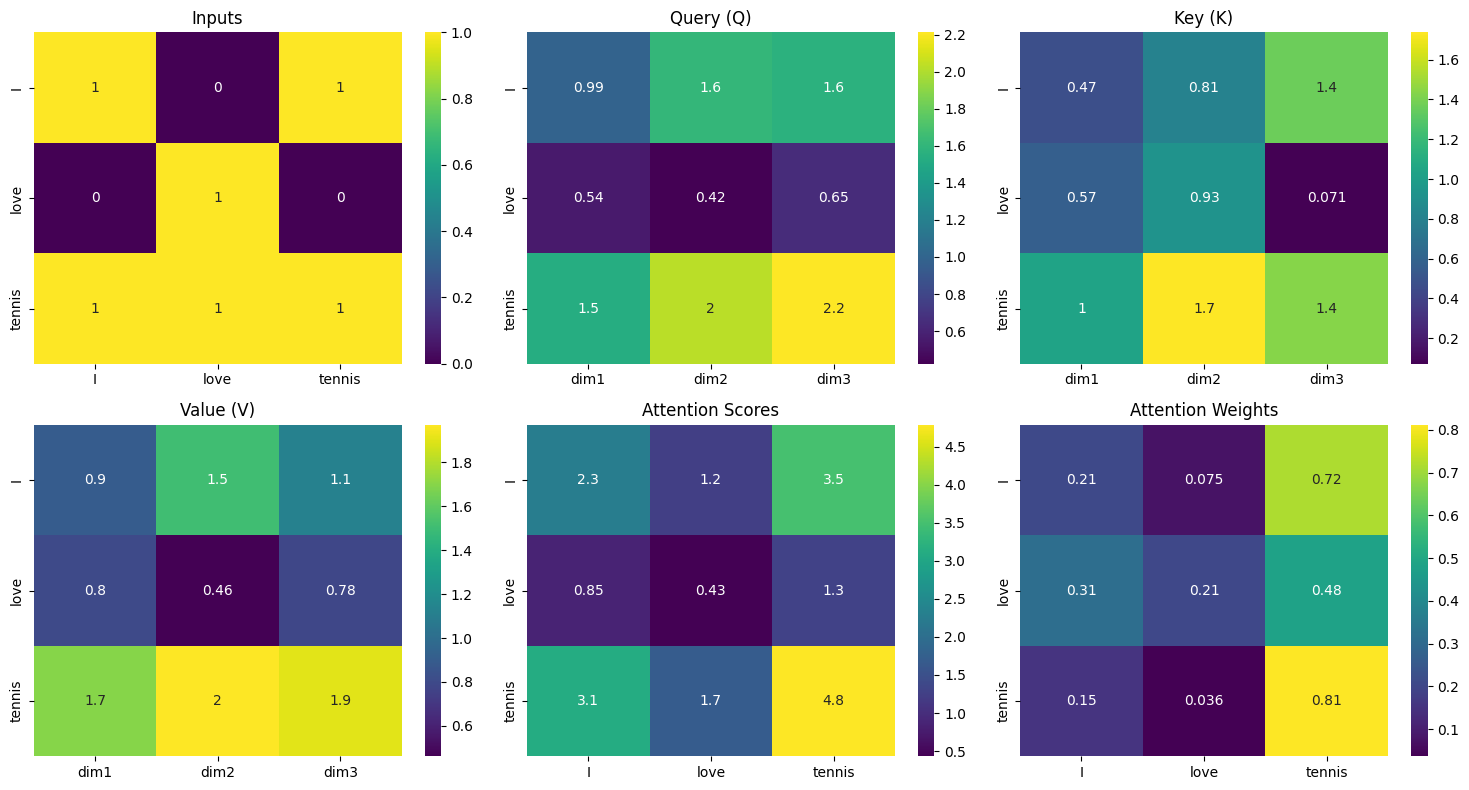

## Self-Attention mechanism: Word embeddings computing

To demonstrate a basic self-attention mechanism with real embeddings, we'll use a simple approach to compute word embeddings based on co-occurrence statistics from the given sentence. Here, I'll provide a complete example including the calculation of basic word embeddings and applying the self-attention mechanism.

### Step-by-Step Process
 - Tokenize the Sentence: We'll split the sentence into individual words (tokens).

 - Calculate Word Embeddings: We'll use a basic technique to create embeddings based on the context of each word. In this case, we'll use one-hot encoding as the simplest form of embedding.

 - Apply Self-Attention: Using the calculated embeddings, we'll apply the self-attention mechanism and visualize the intermediate results.

 - Initialize Weights: Random weights for Query (Q), Key (K), and Value (V) matrices are initialized.

 - Compute Q, K, and V Matrices: The input embeddings are transformed into Q, K, and V matrices using the initialized weights.

 - Compute Attention Scores: Attention scores are calculated by taking the dot product of Q and K transpose, then normalizing by the square root of the key dimension.

 - Apply Softmax to Get Attention Weights: The softmax function is applied to the attention scores to obtain the attention weights.

- Compute the Output: The final output is calculated by multiplying the attention weights with the value matrix V.

 - Visualization: Various stages of the self-attention mechanism (inputs, Q, K, V matrices, attention scores, and attention weights) are visualized using heatmaps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Visualization
plt.figure(figsize=(18, 10))

# Plotting the inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

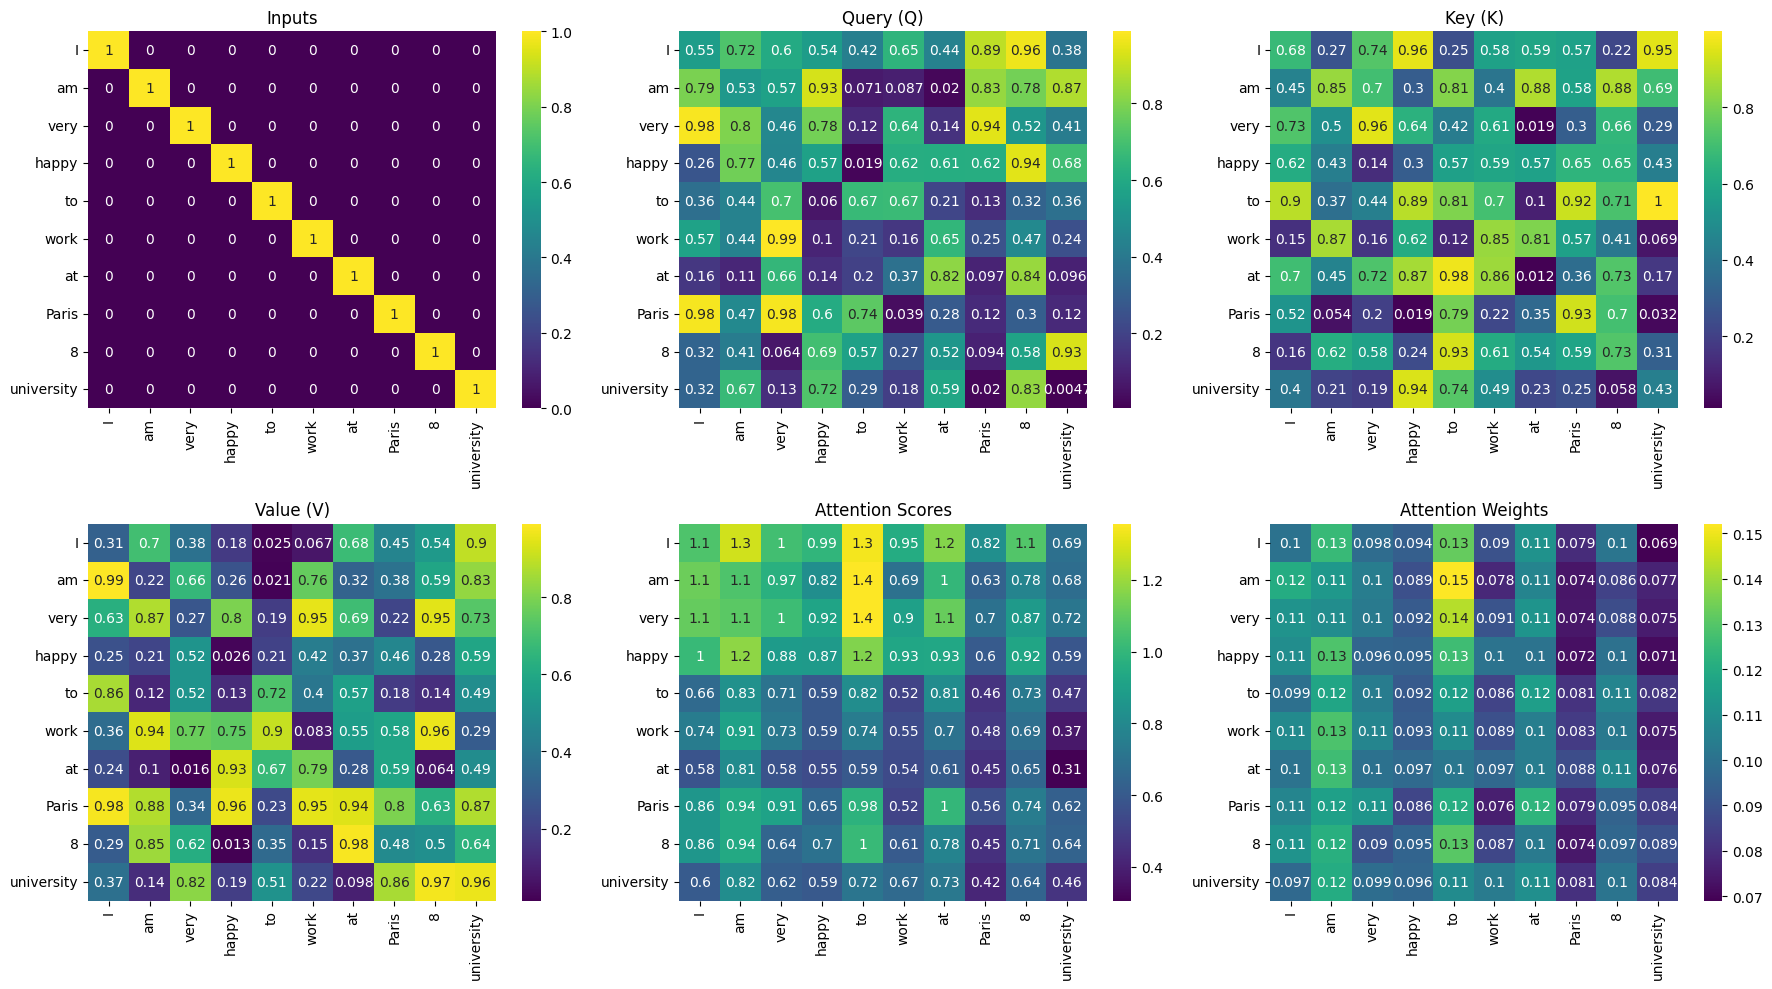

## Complete Encoder Implementation

The encoder implementation involves several key steps, each contributing to transforming the input data and capturing relationships and context within a sentence. Here’s a detailed explanation of each step:


1. Tokenization and Embedding

 - Tokenization: The input sentence "I am very happy to work at Paris 8 university" is split into individual words (tokens), creating a list of tokens.

 - Embedding: Each word in the sentence is represented using one-hot encoding, which is a basic form of word embedding. In one-hot encoding, each word is represented by a unique vector where only one element is 1 (indicating the presence of the word), and all other elements are 0.

2. Initialize Weights

 - Weight Initialization: Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices, as well as for the feed-forward neural network layers. These weights will be used to transform the input embeddings during the self-attention and feed-forward processes.

3. Self-Attention Layer

 - Compute Q, K, and V Matrices: The input embeddings are multiplied by the respective weight matrices to obtain the Q, K, and V matrices. These matrices are essential for calculating attention scores.

 - Calculate Attention Scores: The attention scores are calculated by taking the dot product of the Q matrix and the transpose of the K matrix. The resulting scores are then scaled by the square root of the dimension of the key vectors to ensure stable gradients.

 - Softmax Application: The softmax function is applied to the attention scores to convert them into probabilities, which represent the attention weights. These weights indicate how much attention each word should pay to other words in the sentence.

 - Compute Attention Output: The attention weights are multiplied by the V matrix to obtain the attention output. This output is a weighted sum of the value vectors, capturing the context and relationships between words.

4. Add & Norm Layer (Self-Attention)

 - Residual Connection and Layer Normalization: The attention output is added to the original input embeddings (residual connection) to preserve the initial information. Layer normalization is then applied to the result, ensuring stable and normalized outputs.

5. Feed-Forward Layer

 - Feed-Forward Neural Network: The output from the self-attention layer is passed through a feed-forward neural network, which typically consists of two linear transformations with a ReLU activation function in between. This layer further transforms the data, capturing more complex relationships.

6. Add & Norm Layer (Feed-Forward)

 - Residual Connection and Layer Normalization: The output from the feed-forward layer is added to the self-attention output (residual connection) and normalized again using layer normalization. This step helps in maintaining the stability and richness of the transformed data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)
W1 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 1 weights
W2 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 2 weights

# Self-Attention Layer
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm Layer (Self-Attention Output + Inputs)
attention_output = layer_norm(attention_output + inputs)

# Feed-Forward Layer
ffn_output = np.dot(attention_output, W1)
ffn_output = np.maximum(0, ffn_output)  # ReLU activation
ffn_output = np.dot(ffn_output, W2)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output + attention_output)

# Visualization
plt.figure(figsize=(20, 10))

# Plotting the inputs
plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

# Plotting Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attention_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Output')

# Plotting Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Encoder Output')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)
print("\nFeed-Forward Output:\n", ffn_output)
print("\nEncoder Output:\n", encoder_output)

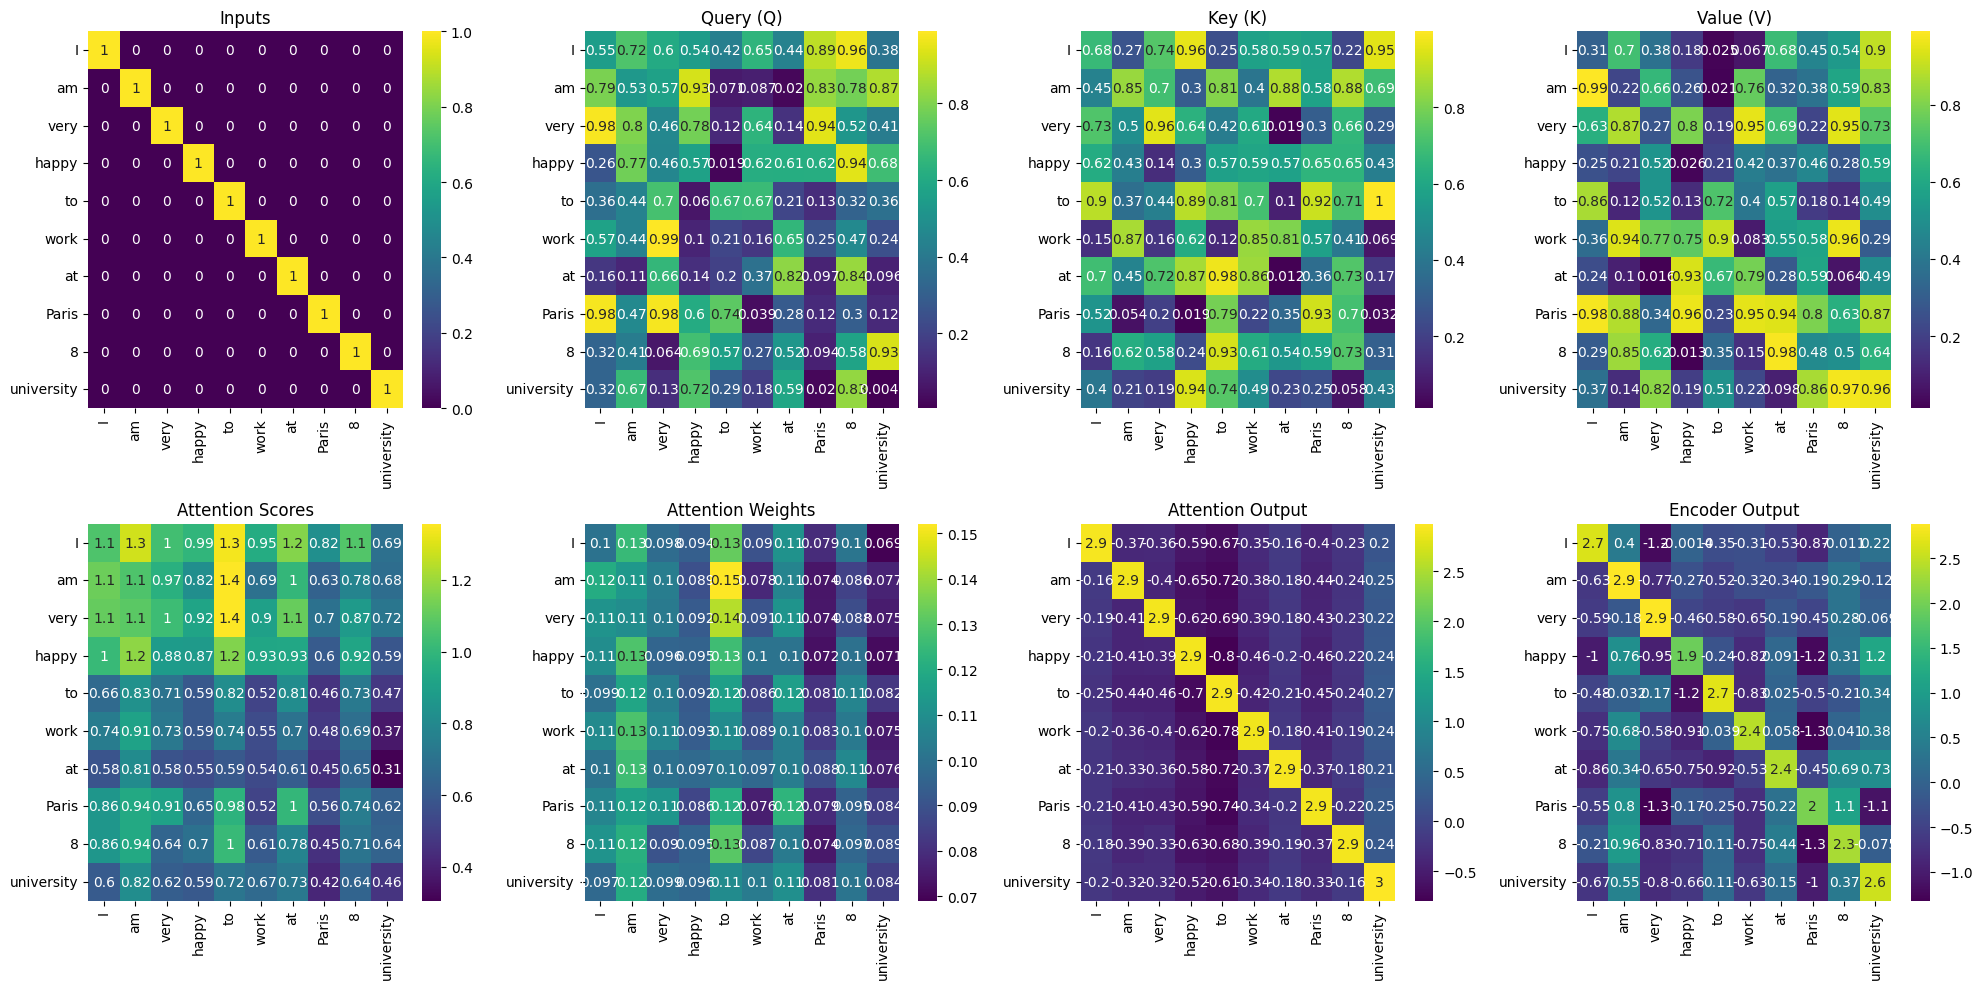

## Complete Encoder-Decoder Implementation Using Self-Attention

To implement a complete encoder-decoder model using self-attention, we'll extend the previous encoder implementation by adding a decoder component. The decoder will also include self-attention and cross-attention layers to process the encoder outputs and generate predictions.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder. Additionally, weights are initialized for the feed-forward layers in both the encoder and decoder.

3. Encoder

 - Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

4. Decoder

 - Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. This step allows the decoder to attend to the encoder's outputs. Attention scores are computed and normalized using softmax to obtain cross-attention weights.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

scores_encoder = np.dot(Q_encoder, K_encoder.T) / np.sqrt(K_encoder.shape[1])
attention_weights_encoder = softmax(scores_encoder)
attention_output_encoder = np.dot(attention_weights_encoder, V_encoder)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

scores_decoder = np.dot(Q_decoder, K_decoder.T) / np.sqrt(K_decoder.shape[1])
attention_weights_decoder = softmax(scores_decoder)
attention_output_decoder = np.dot(attention_weights_decoder, V_decoder)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
attention_weights_cross = softmax(scores_cross)
cross_attention_output = np.dot(attention_weights_cross, V_cross)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

## Complete Encoder-Decoder Implementation Using Multi-Head Self-Attention : A transformer !

This encoder-decoder implementation with multi-head self-attention includes both self-attention and cross-attention mechanisms, residual connections, and layer normalization, demonstrating how the input sentence is transformed and how the decoder attends to the encoder's output to generate the final result. The multi-head attention mechanism allows the model to focus on different parts of the input sentence simultaneously, capturing more complex relationships and context.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder, as well as for the feed-forward neural network layers. These weights are necessary for transforming the input embeddings during self-attention and feed-forward processes.

3. Multi-Head Self-Attention

 - Function Definition: The multi_head_attention function splits Q, K, and V matrices into multiple heads, performs self-attention on each head independently, and concatenates the outputs.

4. Encoder

 - Multi-Head Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

5. Decoder

 - Multi-Head Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. The multi_head_attention function is used to compute the cross-attention output across multiple heads, allowing the decoder to attend to the encoder's outputs.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention function
def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1] # Get the embedding dimension
    d_k = d_model // num_heads # Calculate the dimension of each head
    
    # Linear transformations for each head
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)] 
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    
    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)
    
    # Concatenate all the heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    
    # Linear transformation to map the concatenated output back to the original dimension
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
num_heads = 4
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Multi-Head Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

attention_output_encoder = multi_head_attention(Q_encoder, K_encoder, V_encoder, num_heads)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Multi-Head Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

attention_output_decoder = multi_head_attention(Q_decoder, K_decoder, V_decoder, num_heads)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

cross_attention_output = multi_head_attention(Q_cross, K_cross, V_cross, num_heads)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

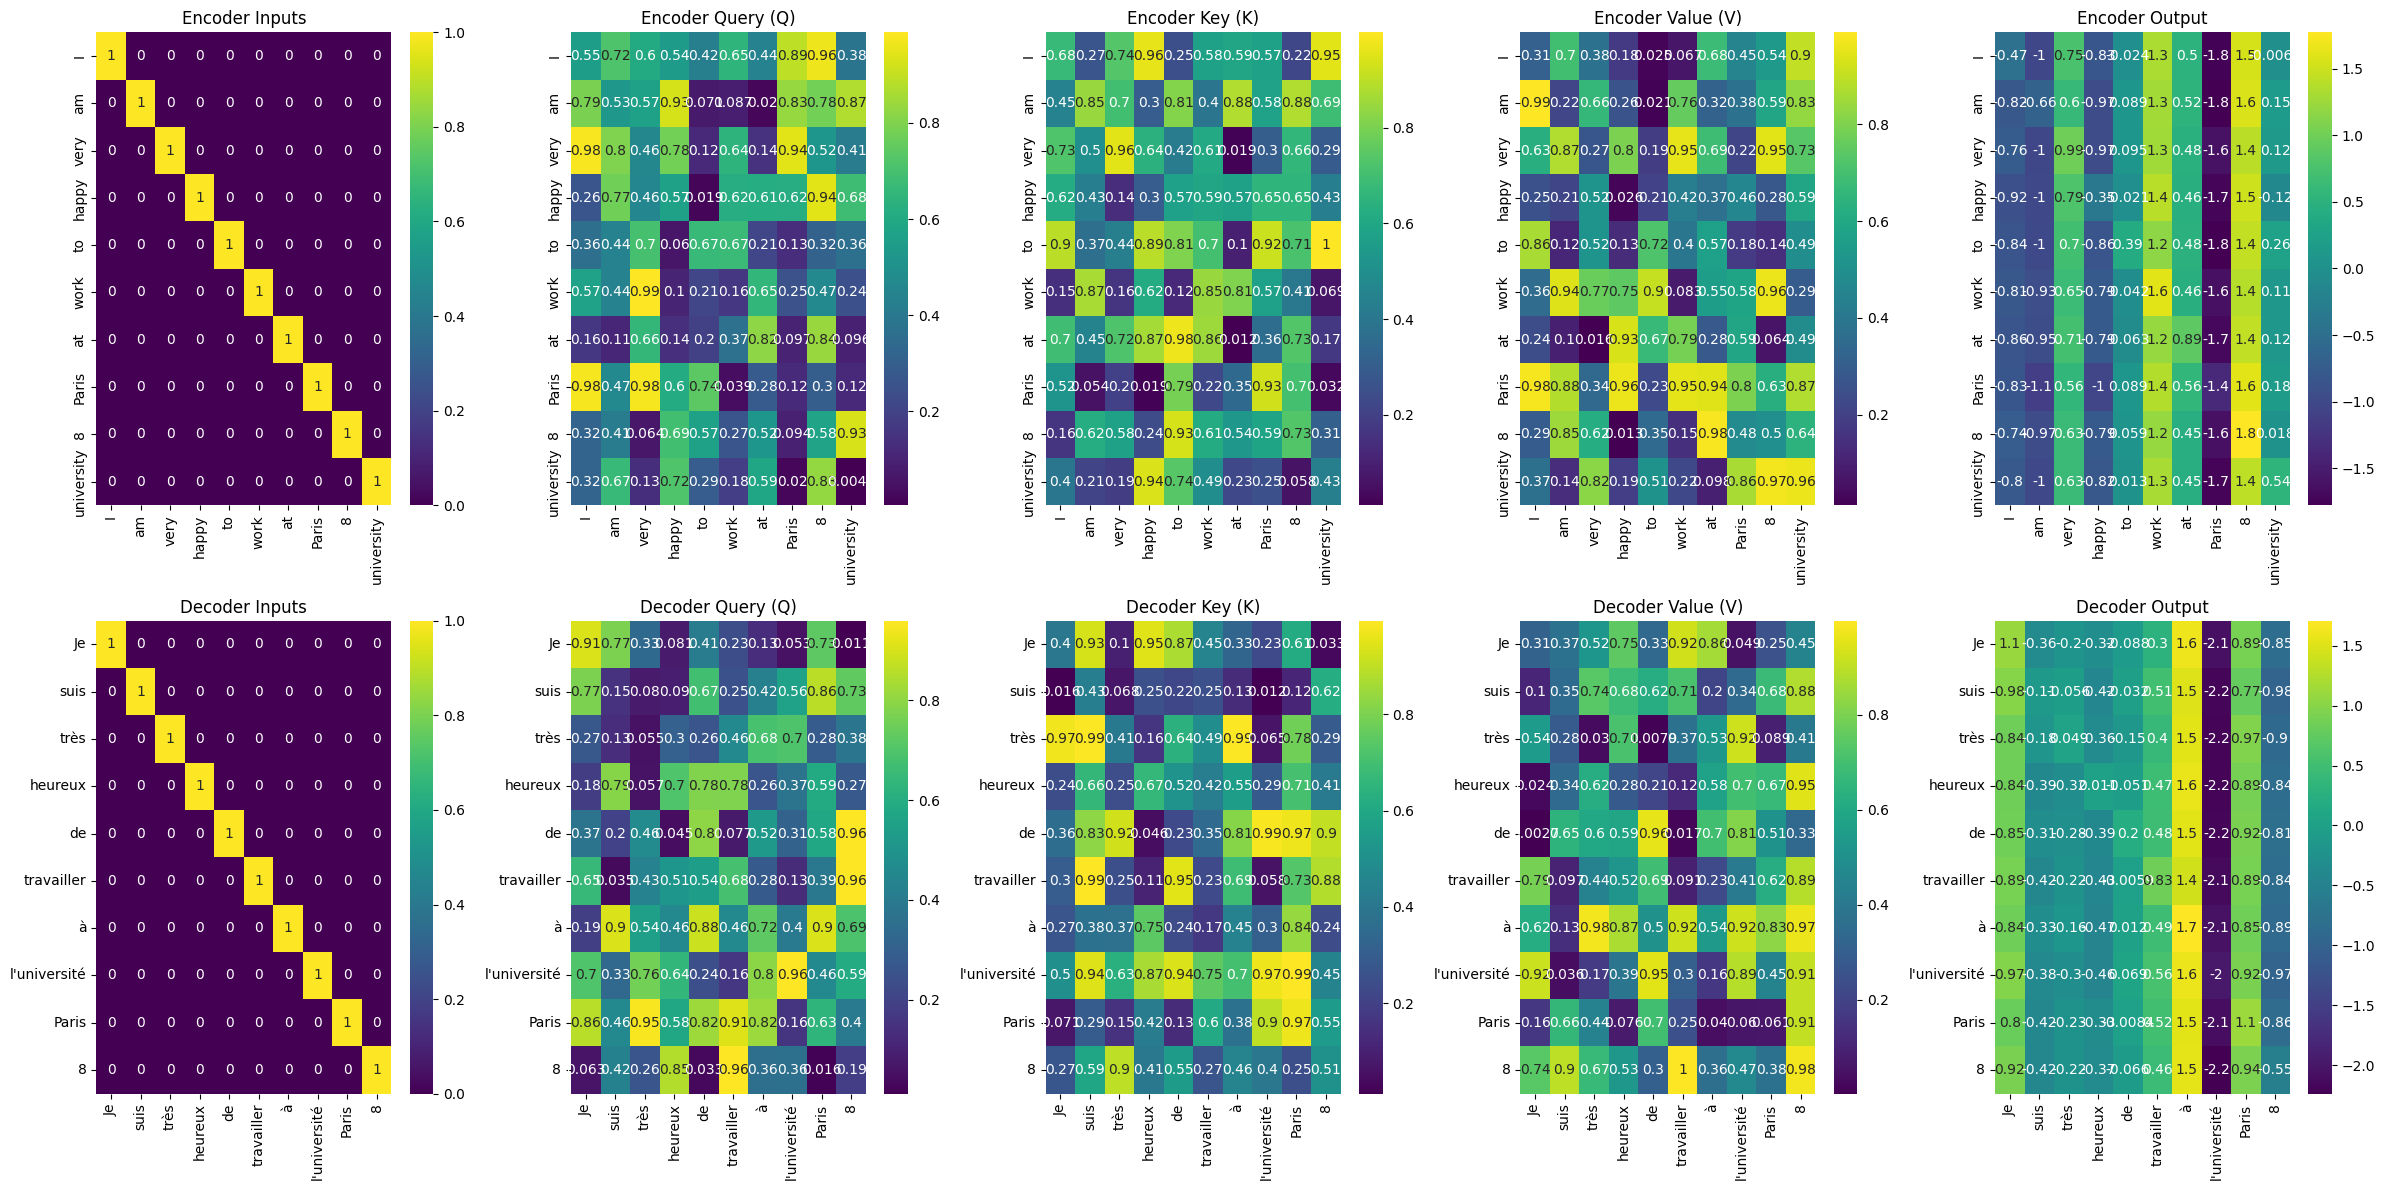

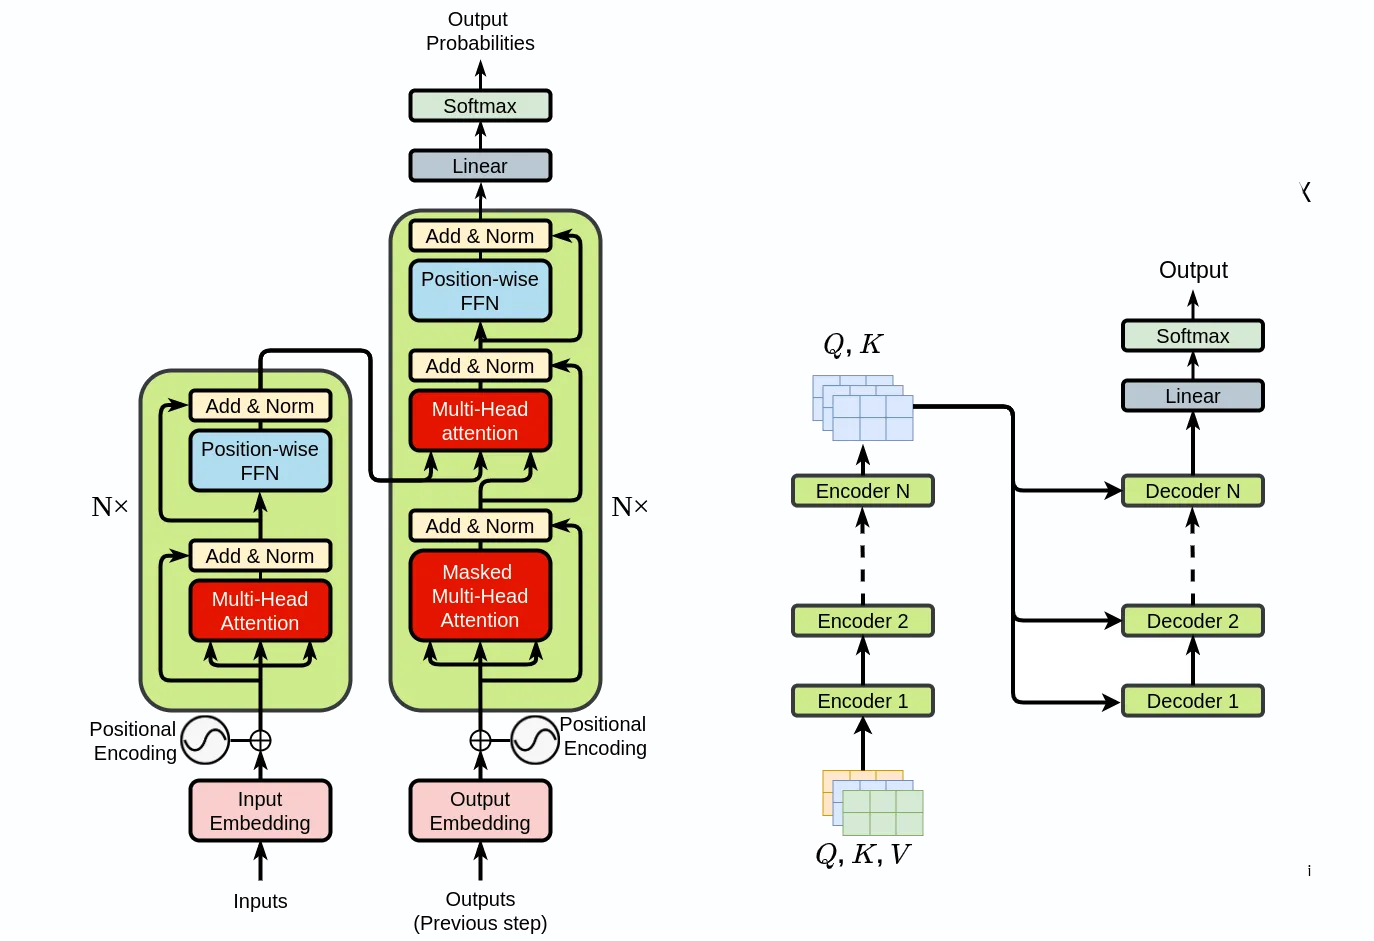

## Exercices 

### Exercice 1 : Self-Attention mechanism: basic implementation

- Modify the `input_sequence` to include an additional dimension and write a function to handle this new input shape. Compute and visualize the query, key, and value matrices for this modified sequence.
- Change the number of attention heads to 2 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head attention.
- Experiment with different scaling factors for the attention scores. Instead of dividing by the square root of the key dimension, try different constants and observe the effects on the attention weights and output. Visualize and discuss the impact.

### Exercice 2: Self-Attention mechanism: Using a sentence as input

- Change the sentence from "I love tennis" to a longer sentence of your choice. Convert this new sentence into a sequence of embeddings and compute the query, key, and value matrices. Visualize and explain the results.
- Implement a masking mechanism to handle padding tokens in the sentence. Compute the attention scores and apply the mask before softmax. Visualize the attention weights with and without masking and discuss the differences.
- Experiment with different embedding initialization methods. Use random initialization and pre-trained embeddings (e.g., from GloVe or FastText). Compute and visualize the attention scores and outputs for both cases. Compare the results.

### Exercice 3: Self-Attention mechanism: Compute word embeddings

- Use a different sentence to compute word embeddings. Tokenize the sentence and create embeddings using a different method (e.g., Word2Vec or GloVe). Compute the query, key, and value matrices for these new embeddings and visualize the results.
- Change the method for initializing weights for the query, key, and value matrices. Use a different initialization technique (e.g., Xavier initialization) and compute the attention scores and attention weights. Visualize and discuss the impact of weight initialization on the self-attention mechanism.
- Implement a positional encoding mechanism for the sentence. Add positional encodings to the embeddings and compute the query, key, and value matrices. Visualize and explain the role of positional encoding in the self-attention mechanism.

### Exercice 4: Self-Attention mechanism: Varying Parameters

- Modify the dimensionality of the embeddings for a given sentence. Experiment with embedding dimensions of 4, 8, and 16. Compute the query, key, and value matrices for each case. Visualize and compare the attention weights and outputs for different embedding dimensions.
- Change the number of attention heads to 4 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head and two-head attention.
- Implement dropout in the attention mechanism. Apply dropout to the attention weights before computing the final attention output. Visualize the results with and without dropout and discuss the impact on the attention mechanism.

### Exercice 5: Self-Attention mechanism: Advanced Techniques

- Implement layer normalization before and after the attention mechanism. Compare the results of both approaches by visualizing the attention weights and outputs. Discuss the impact of layer normalization on the self-attention mechanism.
- Experiment with different activation functions in the feed-forward layer following the attention mechanism. Replace ReLU with other functions (e.g., Leaky ReLU, ELU). Compute and visualize the attention outputs for each activation function and compare the results.
- Implement a mechanism to handle variable-length sequences using masking. Compute the attention scores and apply the mask to ignore padding tokens. Visualize the attention weights and outputs with and without masking and discuss the differences.

### Exercice 6: Self-Attention mechanism: Applications

- Apply the self-attention mechanism to a sentence with named entities (e.g., "Barack Obama was the 44th president of the United States"). Compute the query, key, and value matrices, and visualize the attention weights. Discuss how the self-attention mechanism handles named entities.
- Use the self-attention mechanism for a sequence-to-sequence task (e.g., translation). Compute the attention weights for both the encoder and decoder sequences. Visualize the results and discuss how the attention mechanism captures the relationships between input and output sequences.
- Implement a self-attention mechanism for a text classification task. Compute the attention weights for a sentence and use the final attention output as features for classification. Visualize the attention weights and discuss how the self-attention mechanism helps in identifying important features for classification.

### Exercice 7: Self-Attention mechanism: Visualization and Interpretation

- Use a heatmap to visualize the attention weights for a given sentence. Write a function to plot the heatmap and explain the importance of each word in the context of the sentence.
- Modify the input sentence to include ambiguous words (e.g., "bank" in "The bank will not lend me money"). Compute and visualize the attention weights. Discuss how the self-attention mechanism disambiguates the meaning based on context.
- Implement an interactive visualization tool that allows changing the input sentence and observing the changes in attention weights. Use this tool to demonstrate how different words and their positions affect the attention mechanism.

### Exercice 8: Self-Attention mechanism: Extensions and Modifications

- Extend the self-attention mechanism to include relative position encodings. Compute the attention weights with relative positions and visualize the results. Discuss how relative position encodings improve the model's understanding of the input sequence.
- Implement a variant of the self-attention mechanism that uses a different similarity measure (e.g., cosine similarity instead of dot product). Compute and visualize the attention weights for this new similarity measure and compare the results with the original mechanism.
- Explore the use of multi-headed attention with different numbers of heads. Write functions to compute the attention weights for 1, 2, 4, and 8 heads. Visualize and compare the results, discussing how the number of heads affects the model's performance and complexity.

### Exercice 9: Self-Attention mechanism: Practical Applications

- Apply the self-attention mechanism to a real-world dataset (e.g., a collection of movie reviews). Compute the attention weights for sample sentences and visualize the results. Discuss how the self-attention mechanism captures sentiment and important phrases in the reviews.
- Implement a self-attention mechanism for a document summarization task. Use the attention weights to identify key sentences and generate a summary of the document. Visualize and evaluate the quality of the summary.
- Use the self-attention mechanism to build a question-answering system. Compute the attention weights for questions and corresponding context paragraphs. Visualize the attention weights and discuss how the model identifies relevant information to answer the questions.